### 한글폰트설정

In [ ]:
# 코랩 사용자는 실행후, 런타임 - 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [28]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

In [4]:
import pandas as pd
import numpy as np

### 데이터 불러오기
- 아파트 실거래가 데이터 : `'서울특별시 아파트 실거래가.csv'`
- 지역코드 데이터 : `'법정동코드 전체자료.txt'`

,build_y,year,month,day,dong,price,apt_nm,size,jibun,ji_code,floor
0,1980,2018,1,28,동인동3가,"10,000",극동(고려),39.9000,48,27110,3
1,2009,2018,1,15,동인동4가,"37,000",동인동삼정그린코아,84.9989,220,27110,18
2,2009,2018,1,26,동인동4가,"36,800",동인동삼정그린코아,84.7349,220,27110,6
3,1979,2018,1,28,삼덕동2가,"15,500",아진맨션,94.6400,208-4,27110,4
4,2013,2018,1,3,삼덕동3가,"35,400",삼덕청아람,59.9890,383,27110,11
...,...,...,...,...,...,...,...,...,...,...,...
110338,2011,2020,12,28,구지면 응암리,"16,100",달성화성파크드림,84.8978,1178,27710,1
110339,2011,2020,12,28,구지면 응암리,"16,800",달성화성파크드림,84.8978,1178,27710,10
110340,2011,2020,12,29,구지면 응암리,"15,700",달성화성파크드림,84.8978,1178,27710,13
110341,2017,2020,12,30,구지면 응암리,"23,800",대구국가산단 반도유보라 아이비파크,84.9598,1199,27710,10


,법정동코드,시도명,시군구명
0,11110,서울특별시,종로구
1,11140,서울특별시,중구
2,11170,서울특별시,용산구
3,11200,서울특별시,성동구
4,11215,서울특별시,광진구
...,...,...,...
247,48870,경상남도,함양군
248,48880,경상남도,거창군
249,48890,경상남도,합천군
250,50110,제주특별자치도,제주시


### 데이터 병합을 위해 지역코드 데이터의 컬럼명 변경
- `'법정동코드'` 컬럼을 `ji_code` 컬럼으로 변경

,ji_code,시도명,시군구명
0,11110,서울특별시,종로구
1,11140,서울특별시,중구
2,11170,서울특별시,용산구
3,11200,서울특별시,성동구
4,11215,서울특별시,광진구
...,...,...,...
247,48870,경상남도,함양군
248,48880,경상남도,거창군
249,48890,경상남도,합천군
250,50110,제주특별자치도,제주시


### 두 데이터를 병합
- `pd.merge` 사용

,build_y,year,month,day,dong,price,apt_nm,size,jibun,ji_code,floor,시도명,시군구명
0,1980,2018,1,28,동인동3가,"10,000",극동(고려),39.9000,48,27110,3,대구광역시,중구
1,2009,2018,1,15,동인동4가,"37,000",동인동삼정그린코아,84.9989,220,27110,18,대구광역시,중구
2,2009,2018,1,26,동인동4가,"36,800",동인동삼정그린코아,84.7349,220,27110,6,대구광역시,중구
3,1979,2018,1,28,삼덕동2가,"15,500",아진맨션,94.6400,208-4,27110,4,대구광역시,중구
4,2013,2018,1,3,삼덕동3가,"35,400",삼덕청아람,59.9890,383,27110,11,대구광역시,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110338,2011,2020,12,28,구지면 응암리,"16,100",달성화성파크드림,84.8978,1178,27710,1,대구광역시,달성군
110339,2011,2020,12,28,구지면 응암리,"16,800",달성화성파크드림,84.8978,1178,27710,10,대구광역시,달성군
110340,2011,2020,12,29,구지면 응암리,"15,700",달성화성파크드림,84.8978,1178,27710,13,대구광역시,달성군
110341,2017,2020,12,30,구지면 응암리,"23,800",대구국가산단 반도유보라 아이비파크,84.9598,1199,27710,10,대구광역시,달성군


### 데이터 전처리

build_y    0
year       0
month      0
day        0
dong       0
price      0
apt_nm     0
size       0
jibun      0
ji_code    0
floor      0
시도명        0
시군구명       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110343 entries, 0 to 110342
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   build_y  110343 non-null  int64  
 1   year     110343 non-null  int64  
 2   month    110343 non-null  int64  
 3   day      110343 non-null  int64  
 4   dong     110343 non-null  object 
 5   price    110343 non-null  object 
 6   apt_nm   110343 non-null  object 
 7   size     110343 non-null  float64
 8   jibun    110343 non-null  object 
 9   ji_code  110343 non-null  int64  
 10  floor    110343 non-null  int64  
 11  시도명      110343 non-null  object 
 12  시군구명     110343 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 11.8+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110343 entries, 0 to 110342
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   build_y  110343 non-null  int64  
 1   year     110343 non-null  int64  
 2   month    110343 non-null  int64  
 3   day      110343 non-null  int64  
 4   dong     110343 non-null  object 
 5   price    110343 non-null  int32  
 6   apt_nm   110343 non-null  object 
 7   size     110343 non-null  float64
 8   jibun    110343 non-null  object 
 9   ji_code  110343 non-null  int64  
 10  floor    110343 non-null  int64  
 11  시도명      110343 non-null  object 
 12  시군구명     110343 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 11.4+ MB


### 아파트별 거래건수 출력

하나리움퀸즈파크           908
대구테크노폴리스남해오네뜨1차    792
대구월배2차 아이파크        640
진천역AK그랑폴리스         576
청구타운               505
                  ... 
고려그린                 1
파크밸리2차               1
강남골든하이츠              1
범어네스트                1
봉덕맨션                 1
Name: apt_nm, Length: 1741, dtype: int64

### 상위 10개 아파트만 시각화로 비교해보기

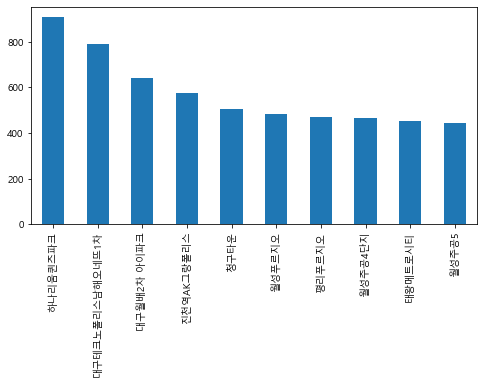

### 월별 거래건수 출력

11    12499
10    11657
6     10158
9      9774
12     9409
7      9356
8      8857
3      8312
5      7966
2      7683
1      7521
4      7151
Name: month, dtype: int64

### 시각화로 비교해보기

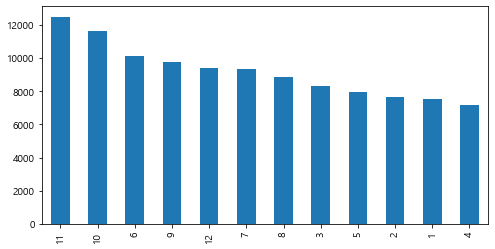

In [51]:
# groupby와 value_counts의 차이?


month
1      7521
2      7683
3      8312
4      7151
5      7966
6     10158
7      9356
8      8857
9      9774
10    11657
11    12499
12     9409
Name: apt_nm, dtype: int64

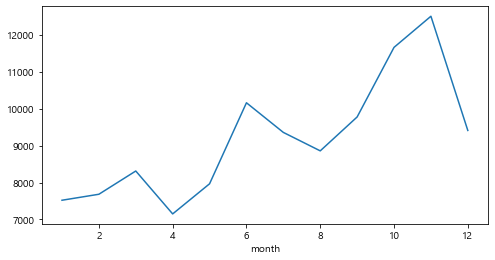

### 그룹핑, 피봇테이블을 활용해서, 다양한 관점으로 분석
- 지역, 월 별 거래 건수

In [54]:
# pivot_table 사용


month,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
남구,180,201,211,203,228,286,287,230,279,290,358,238
달서구,2112,2131,2135,2236,2343,2859,2702,2473,2731,3355,3232,2313
달성군,833,835,1622,772,927,2050,1270,1097,1058,1336,1586,1578
동구,1076,1119,990,931,1081,1029,1158,1192,1334,1599,1630,1401
북구,1550,1563,1574,1462,1544,1666,1607,1687,1796,2082,2623,1943
서구,304,310,413,355,360,365,363,268,316,347,469,279
수성구,1243,1224,1133,998,1258,1609,1701,1658,1925,2288,2144,1405
중구,223,300,234,194,225,294,268,252,335,360,457,252


#### 피봇테이블을 시각화할 때 가장 효과적
- `sns.heatmap()`

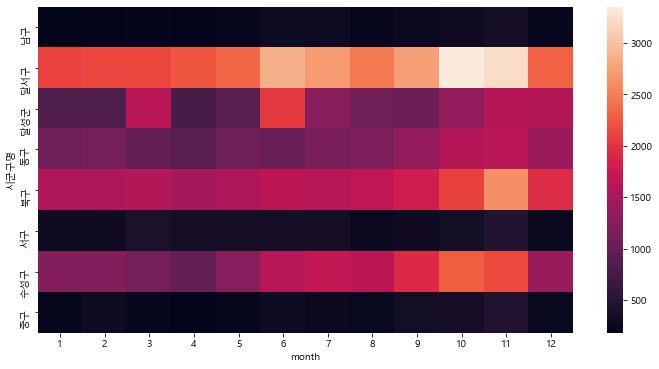

- 시군구별 거래건수 확인

In [62]:
# groupby 사용


시군구명
남구      2991
달서구    30622
달성군    14964
동구     14540
북구     21097
서구      4149
수성구    18586
중구      3394
Name: price, dtype: int64

- 막대차트로 시각화

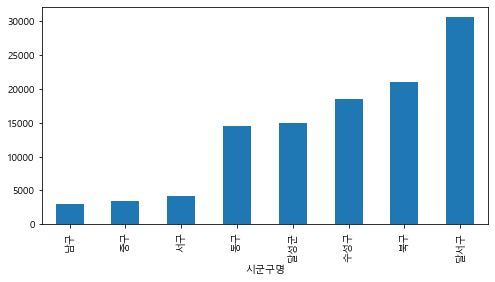

- 시군구, 월 별 거래가격 총합 확인

In [66]:
# pivot_table 사용


month,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
남구,4686820,5368900,5608055,5647719,5981364,8608550,8494935,6394832,7894500,8417600,11186550,7225679
달서구,59688530,58150880,57588920,60923604,65069338,83105477,80778026,74819739,86225247,108495117,101364465,68023740
달성군,18259378,17886116,29260778,16649708,20216713,40528250,29150580,25229416,25374250,32232780,40872860,37414075
동구,28538053,29302207,25287544,22848620,27737699,26823737,30477631,32308689,37144070,44472562,47976280,38478572
북구,38339625,38298625,37259831,33966885,35624402,41197137,39779143,41946616,45946705,53290225,76473293,49850029
서구,7062190,7425862,9365209,8092985,8221012,8849506,9410999,6638630,8135126,9328008,10803769,7330120
수성구,55319152,56943360,48400500,39531761,51706920,75928105,86745512,84463110,100859118,121278535,104262905,64619847
중구,8558178,11455710,8915515,7242240,8830820,12210180,11844995,10643346,14586225,16605310,20930800,11413805


- `sns.heatmap`으로 시각화

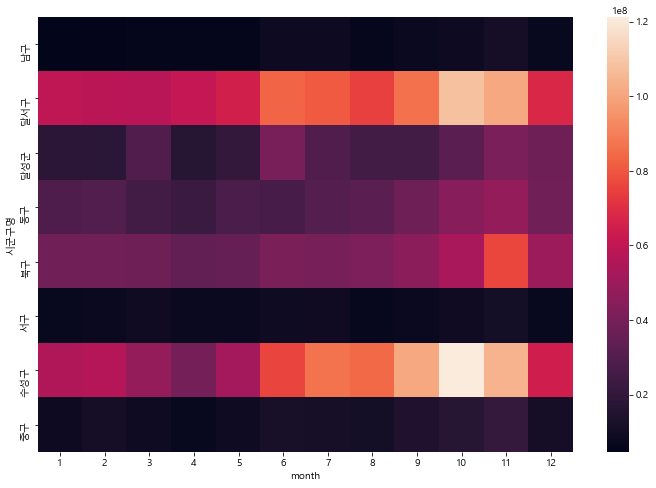

- 시군구, 월 별 거래가격 평균 확인

In [71]:
# pivot_table 사용


month,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
남구,26037.89,26710.95,26578.46,27821.28,26234.05,30099.83,29599.08,27803.62,28295.70,29026.21,31247.35,30360.00
달서구,28261.61,27288.07,26973.73,27246.69,27771.80,29068.02,29895.64,30254.65,31572.77,32338.34,31362.77,29409.31
달성군,21920.02,21420.50,18039.94,21566.98,21808.75,19769.88,22953.21,22998.56,23983.22,24126.33,25771.03,23709.81
동구,26522.35,26186.07,25542.97,24542.02,25659.30,26067.77,26319.20,27104.60,27844.13,27812.73,29433.30,27465.08
북구,24735.24,24503.28,23672.07,23233.16,23072.80,24728.17,24753.67,24864.62,25582.80,25595.69,29154.90,25656.22
서구,23230.89,23954.39,22676.05,22797.14,22836.14,24245.22,25925.62,24771.01,25744.07,26881.87,23035.75,26272.83
수성구,44504.55,46522.35,42718.89,39610.98,41102.48,47189.62,50996.77,50942.77,52394.35,53006.35,48630.09,45992.77
중구,38377.48,38185.70,38100.49,37331.13,39248.09,41531.22,44197.74,42235.50,43540.97,46125.86,45800.44,45292.88


- `sns.heatmap`으로 시각화

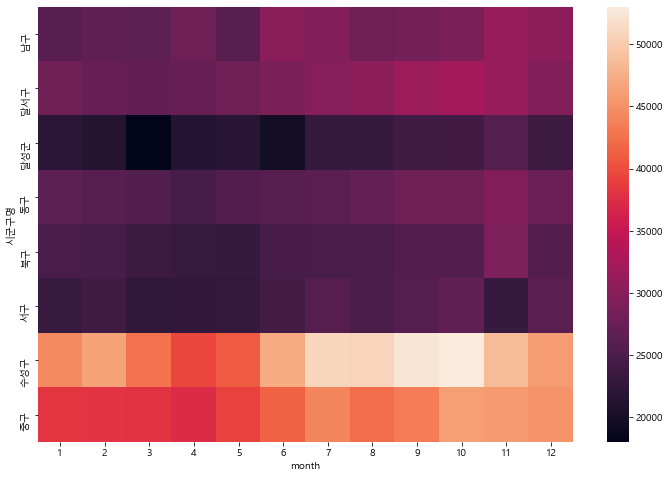

- 시군구, 동 별 거래가격의 총합 확인

price
시군구명 dong            
남구    대명동    24390188
      봉덕동    41718681
      이천동    19406635
달서구   감삼동    54758687
      대곡동    30943757
...               ...
중구    시장북로     119000
      장관동       75000
      태평로1가   1167700
      태평로2가     80700
      태평로3가    102100

[146 rows x 1 columns]

- 막대차트로 상위 10개 동만 시각화

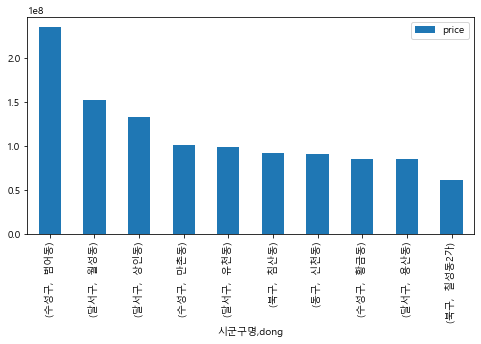

,build_y,year,month,day,dong,price,apt_nm,size,jibun,ji_code,floor,시도명,시군구명
46130,2000,2018,1,2,월계동,36500,현대,59.950,929,11350,8,서울특별시,노원구
46131,2006,2018,1,2,월계동,49200,롯데캐슬루나,84.985,947,11350,8,서울특별시,노원구
46132,2016,2018,1,2,월계동,45000,꿈의숲 SK VIEW,59.920,949,11350,13,서울특별시,노원구
46133,1995,2018,1,2,월계동,20800,사슴3,39.600,320-11,11350,2,서울특별시,노원구
46134,1995,2018,1,3,월계동,27000,사슴3,49.500,320-11,11350,8,서울특별시,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138014,1983,2019,12,27,도곡동,170000,삼익,104.010,869,11680,12,서울특별시,강남구
138015,1999,2019,12,27,도곡동,145000,대림아크로빌,130.545,467-6,11680,8,서울특별시,강남구
138016,1999,2019,12,28,도곡동,114000,매봉삼성,59.820,966,11680,20,서울특별시,강남구
138017,1999,2019,12,30,도곡동,150000,도곡현대힐스테이트 105동,164.900,184-3,11680,1,서울특별시,강남구


### 특정 아파트를 기준으로 분석

,build_y,year,month,day,dong,price,apt_nm,size,jibun,ji_code,floor,시도명,시군구명
65283,2016,2018,1,5,유천동,45200,대구월배2차 아이파크,84.5402,612,27290,16,대구광역시,달서구
65287,2016,2018,1,6,유천동,44800,대구월배2차 아이파크,84.5402,612,27290,23,대구광역시,달서구
65295,2016,2018,1,8,유천동,46500,대구월배2차 아이파크,84.5402,612,27290,10,대구광역시,달서구
65296,2016,2018,1,8,유천동,46000,대구월배2차 아이파크,84.5402,612,27290,12,대구광역시,달서구
65301,2016,2018,1,9,유천동,32500,대구월배2차 아이파크,59.7565,612,27290,3,대구광역시,달서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95197,2016,2020,12,5,유천동,67000,대구월배2차 아이파크,84.2245,612,27290,24,대구광역시,달서구
95205,2016,2020,12,11,유천동,64500,대구월배2차 아이파크,84.2245,612,27290,14,대구광역시,달서구
95215,2016,2020,12,16,유천동,48000,대구월배2차 아이파크,59.7565,612,27290,29,대구광역시,달서구
95218,2016,2020,12,22,유천동,52800,대구월배2차 아이파크,74.3578,612,27290,5,대구광역시,달서구


### 가장 비싼 거래건수 10건을 출력

,build_y,year,month,day,dong,price,apt_nm,size,jibun,ji_code,floor,시도명,시군구명
94111,2016,2020,11,8,유천동,76600,대구월배2차 아이파크,101.3601,612,27290,5,대구광역시,달서구
88951,2016,2020,7,25,유천동,75900,대구월배2차 아이파크,101.3601,612,27290,21,대구광역시,달서구
91247,2016,2020,9,29,유천동,74800,대구월배2차 아이파크,101.3601,612,27290,18,대구광역시,달서구
91204,2016,2020,9,22,유천동,74700,대구월배2차 아이파크,101.3601,612,27290,14,대구광역시,달서구
92520,2016,2020,10,17,유천동,74000,대구월배2차 아이파크,101.3601,612,27290,13,대구광역시,달서구
90135,2016,2020,8,29,유천동,74000,대구월배2차 아이파크,101.3601,612,27290,26,대구광역시,달서구
87482,2016,2020,6,20,유천동,73800,대구월배2차 아이파크,101.3601,612,27290,23,대구광역시,달서구
88939,2016,2020,7,22,유천동,73500,대구월배2차 아이파크,101.3601,612,27290,28,대구광역시,달서구
83939,2016,2020,2,20,유천동,73500,대구월배2차 아이파크,101.3601,612,27290,18,대구광역시,달서구
81130,2016,2019,11,14,유천동,73500,대구월배2차 아이파크,101.3601,612,27290,23,대구광역시,달서구


### 연도별 거래 건수 확인

In [91]:
# groupby 사용


year
2018    148
2019    134
2020    358
Name: price, dtype: int64

### 해당 데이터를 시각화

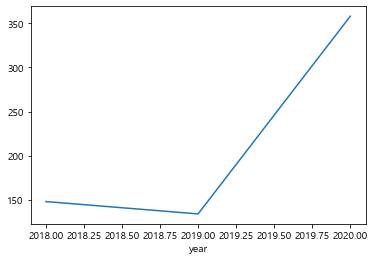

### 연도, 월 별 거래 건수 확인

In [96]:
# pivot_table


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2018,12,9,18,10,14,11,11,9,21,18,6,9
2019,2,0,2,4,5,13,5,17,17,17,26,26
2020,13,14,10,11,20,50,70,36,41,61,26,6


- `sns.heatmap`으로 시각화

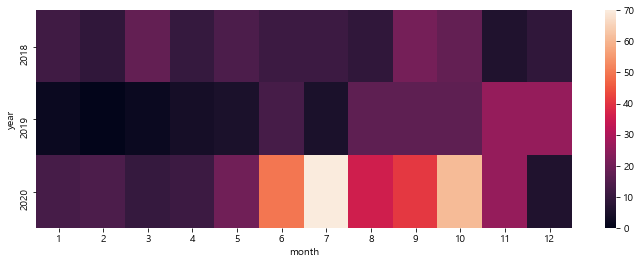

### 층수 별 거래가격의 평균 확인

In [105]:
# groupby 사용


,price
floor,
1,56866.666667
2,44405.000000
3,45231.578947
4,44664.814815
5,46372.727273
6,49516.000000
7,45823.076923
8,50026.190476
9,46995.454545


### 결과를 정렬해서, 막대차트로 시각화

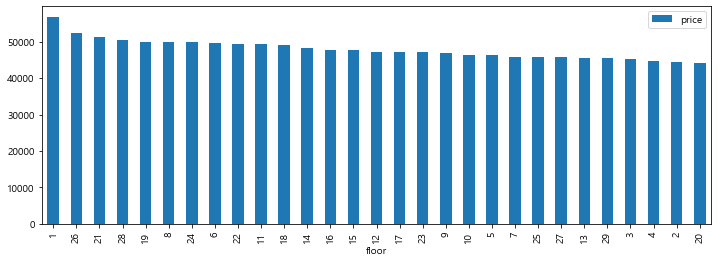

### 층수, 면적 별 거래가격의 평균 확인
- 비어있는 값은 0으로 치환

In [109]:
# pivot_table 사용


size,59.7326,59.7565,74.3578,84.2245,84.3450,84.5402,101.3601
floor,,,,,,,
1,0.000000,0.000000,45000.000000,45750.000000,0.000000,0.000000,68233.333333
2,34000.000000,33633.333333,40850.000000,47125.000000,0.000000,50420.000000,67500.000000
3,0.000000,33150.000000,40350.000000,47633.333333,0.000000,50320.000000,0.000000
4,33700.000000,35620.000000,41200.000000,47877.777778,48200.000000,49137.500000,64300.000000
5,30800.000000,33487.500000,45500.000000,49000.000000,49500.000000,49725.000000,76600.000000
6,0.000000,33950.000000,41900.000000,47264.285714,50416.666667,51100.000000,67875.000000
7,31000.000000,34325.000000,43000.000000,51828.571429,47750.000000,50450.000000,64900.000000
8,0.000000,34375.000000,43860.000000,49600.000000,0.000000,50933.333333,69633.333333
9,0.000000,34277.777778,41180.000000,50916.666667,54183.333333,51971.428571,68200.000000


- `sns.heatmap`으로 시각화

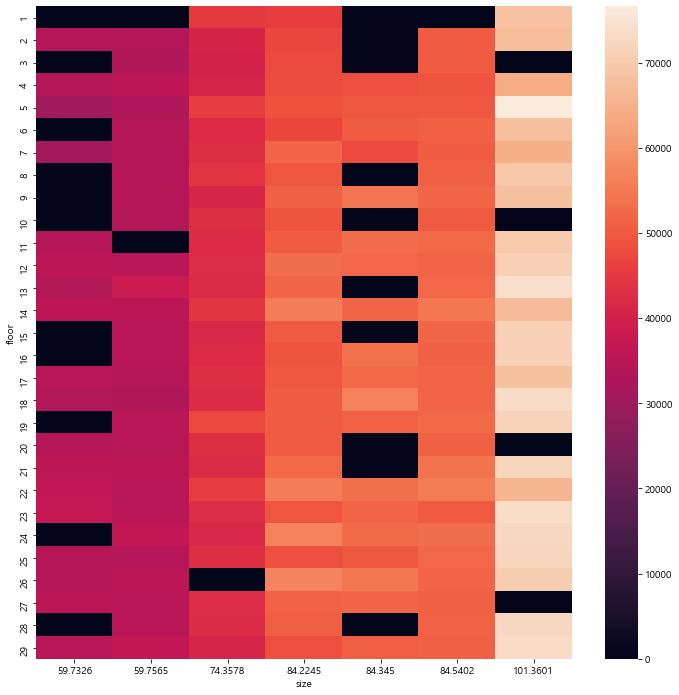